# Upvote if you like, thanks.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This file is from [Blending High Scores - top 1% - 8th place](https://www.kaggle.com/jolasa/blending-high-scores-top-1-8th-place), and score is 0.10382

In [2]:
train = pd.read_csv('../data/train.csv')
final_sub = pd.read_csv('new_submission.csv')

In [3]:
q1 = final_sub['SalePrice'].quantile(0.0025)
q2 = final_sub['SalePrice'].quantile(0.0045)
q3 = final_sub['SalePrice'].quantile(0.99)

final_sub['SalePrice'] = final_sub['SalePrice'].apply(lambda x: x if x > q1 else x*0.79)
final_sub['SalePrice'] = final_sub['SalePrice'].apply(lambda x: x if x > q2 else x*0.89)
final_sub['SalePrice'] = final_sub['SalePrice'].apply(lambda x: x if x < q3 else x*1.0)

final_sub.to_csv('submission.csv', index=False)

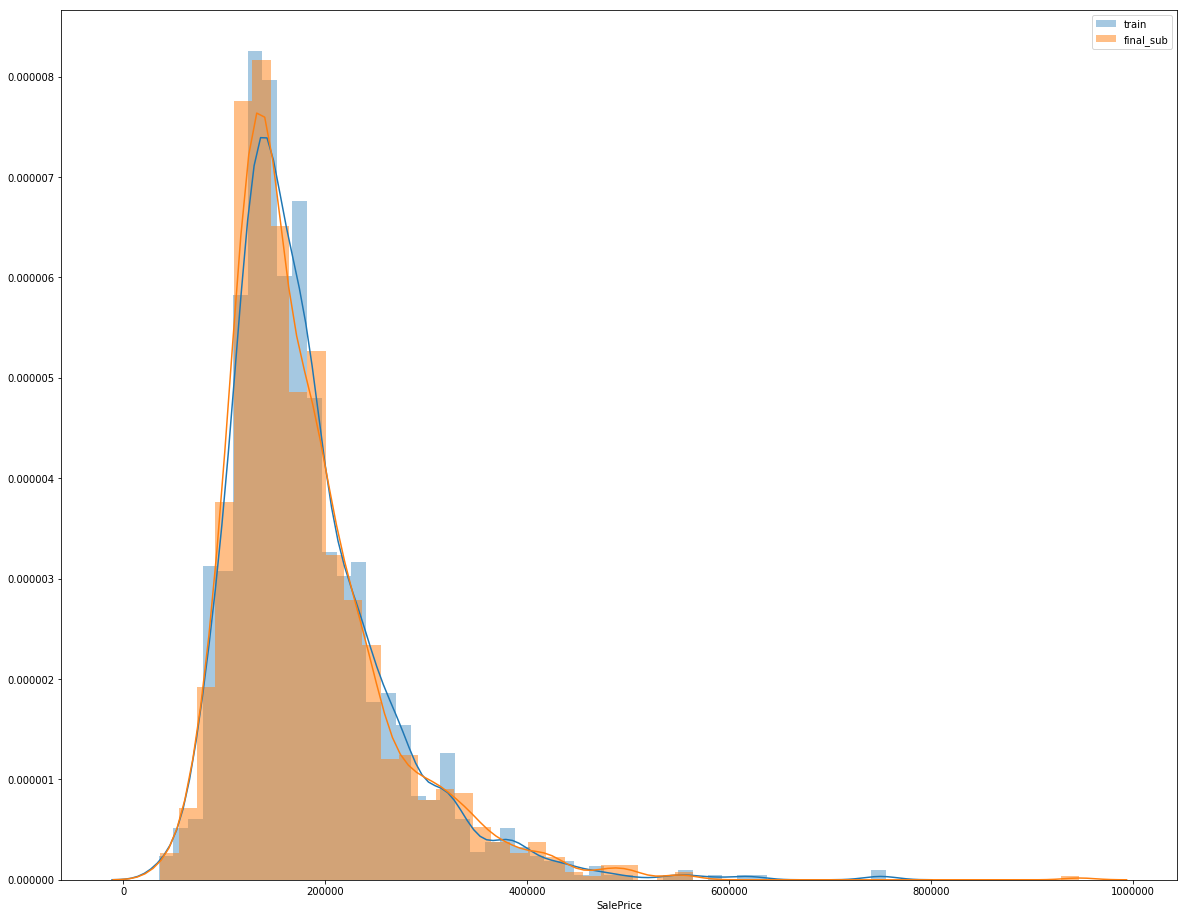

In [4]:
plt.figure(figsize=(20,16))
sns.distplot(train["SalePrice"], label='train')
sns.distplot(final_sub["SalePrice"], hist_kws={'alpha':0.5}, label='final_sub')
plt.legend()